In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv('house data.csv')

**Data Exploration**

In [6]:
df.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0


In [7]:
df.shape

(93689, 10)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93689 entries, 0 to 93688
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   status          93689 non-null  object 
 1   bed             69593 non-null  float64
 2   bath            69675 non-null  float64
 3   acre_lot        80530 non-null  float64
 4   city            93636 non-null  object 
 5   state           93688 non-null  object 
 6   zip_code        93493 non-null  float64
 7   house_size      69614 non-null  float64
 8   prev_sold_date  25957 non-null  object 
 9   price           93688 non-null  float64
dtypes: float64(6), object(4)
memory usage: 7.1+ MB


In [9]:
df.describe()

,bed,bath,acre_lot,zip_code,house_size,price
count,69593.000000,69675.000000,80530.000000,93493.000000,6.961400e+04,9.368800e+04
mean,3.694768,2.489731,14.335082,2122.087119,2.169492e+03,4.309608e+05
std,2.039057,1.562862,868.131358,2496.968097,5.811150e+03,9.976333e+05
min,1.000000,1.000000,0.000000,601.000000,1.000000e+02,4.450000e+02
25%,3.000000,2.000000,0.200000,966.000000,1.200000e+03,1.199000e+05
50%,3.000000,2.000000,0.520000,1201.000000,1.719000e+03,2.500000e+05
75%,4.000000,3.000000,2.000000,1604.000000,2.552000e+03,4.500000e+05
max,86.000000,56.000000,100000.000000,99999.000000,1.450112e+06,6.000000e+07


In [10]:
df.describe(include = 'object')

,status,city,state,prev_sold_date
count,93689,93636,93688,25957
unique,3,510,12,3157
top,for_sale,San Juan,Massachusetts,2000-06-30
freq,93529,4788,48680,71


**Data Cleaning**

In [11]:
df.duplicated().sum()

81024

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12665 entries, 0 to 93688
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   status          12665 non-null  object 
 1   bed             9417 non-null   float64
 2   bath            9418 non-null   float64
 3   acre_lot        11031 non-null  float64
 4   city            12648 non-null  object 
 5   state           12664 non-null  object 
 6   zip_code        12636 non-null  float64
 7   house_size      9418 non-null   float64
 8   prev_sold_date  4297 non-null   object 
 9   price           12664 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.1+ MB


In [14]:
df_missing=df.isna().sum()*100/len(df)
print('Missing Values in Percentages')
df_missing

Missing Values in Percentages


status             0.000000
bed               25.645480
bath              25.637584
acre_lot          12.901698
city               0.134228
state              0.007896
zip_code           0.228977
house_size        25.637584
prev_sold_date    66.071852
price              0.007896
dtype: float64

In [15]:
def remove_with_all_missing(df):
    '''
    Remove the records when all important features are missing,
    Here, I removed reocrds when housing size, bedroom, bathroom and acre lot are missing
    '''
    df = df[(~df['house_size'].isnull())
        | (~df['bed'].isnull())
        | (~df['bath'].isnull())
        | (~df['acre_lot'].isnull())]
    return df

In [16]:
df= remove_with_all_missing(df)

In [17]:
df.isnull().sum()

status               0
bed               3227
bath              3226
acre_lot          1613
city                16
state                0
zip_code            28
house_size        3226
prev_sold_date    8350
price                0
dtype: int64

Here We can see that there are lots of missing values in Bed, Bath, Acre_lot, House_size and Previous_sold_date so we will use imputer for all except prev_sold_date because it will not contribute much in our analysis

In [18]:
# Mode imputation to handle missing value
df['bed'].fillna(df['bed'].mode()[0], inplace=True)
df['bath'].fillna(df['bath'].mode()[0], inplace=True)
df['acre_lot'].fillna(df['acre_lot'].mode()[0], inplace=True)
df['house_size'].fillna(df['house_size'].mode()[0], inplace=True)

In [19]:
df = df.dropna(subset=['zip_code','city', 'price'])
df = df.drop('prev_sold_date', axis=1)

In [20]:
df.isnull().sum()

status        0
bed           0
bath          0
acre_lot      0
city          0
state         0
zip_code      0
house_size    0
price         0
dtype: int64

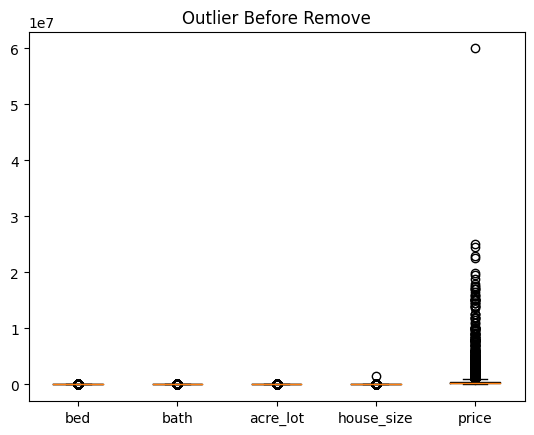

Total Row With Outlier: 12615


In [21]:
column_num = ['bed','bath','acre_lot','house_size','price']
plt.boxplot(df[column_num])
plt.xticks([1, 2, 3, 4, 5], column_num)
plt.title('Outlier Before Remove')
plt.show()
print(f'Total Row With Outlier: {df.shape[0]}')

In [22]:
column_num = ['bed', 'bath', 'acre_lot', 'house_size']
Q1 = df[column_num].quantile(0.25)
Q3 = df[column_num].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[column_num] < (Q1 - 1.5 * IQR)) | (df[column_num] > (Q3 + 1.5 * IQR))).any(axis=1)]

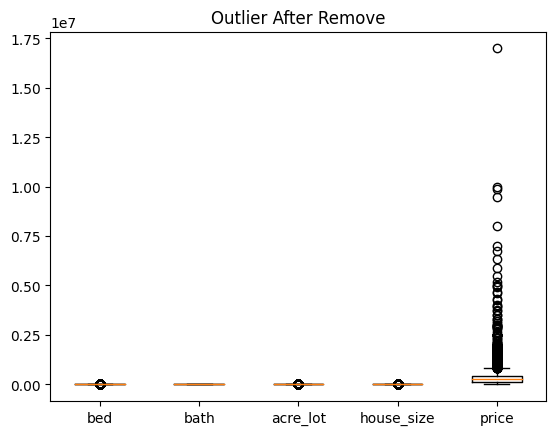

Total Row Without Outlier: 9049


In [23]:
column_num = ['bed','bath','acre_lot','house_size','price']
plt.boxplot(df[column_num])
plt.xticks([1, 2, 3, 4, 5], column_num)
plt.title('Outlier After Remove')
plt.show()
print(f'Total Row Without Outlier: {df.shape[0]}')

In [24]:
df.describe()

,bed,bath,acre_lot,zip_code,house_size,price
count,9049.00000,9049.000000,9049.000000,9049.000000,9049.000000,9.049000e+03
mean,3.12576,2.156371,0.710187,3386.083987,1623.871699,3.435676e+05
std,0.71216,0.744545,0.864857,3254.509098,673.161476,4.524468e+05
min,2.00000,1.000000,0.000000,601.000000,181.000000,7.900000e+03
25%,3.00000,2.000000,0.110000,966.000000,1200.000000,1.340000e+05
50%,3.00000,2.000000,0.330000,1719.000000,1351.000000,2.575000e+05
75%,3.00000,3.000000,0.960000,6074.000000,1977.000000,4.199000e+05
max,5.00000,4.000000,4.150000,99999.000000,3962.000000,1.699500e+07


**Explotatory Data Analysis**

<function matplotlib.pyplot.show(close=None, block=None)>

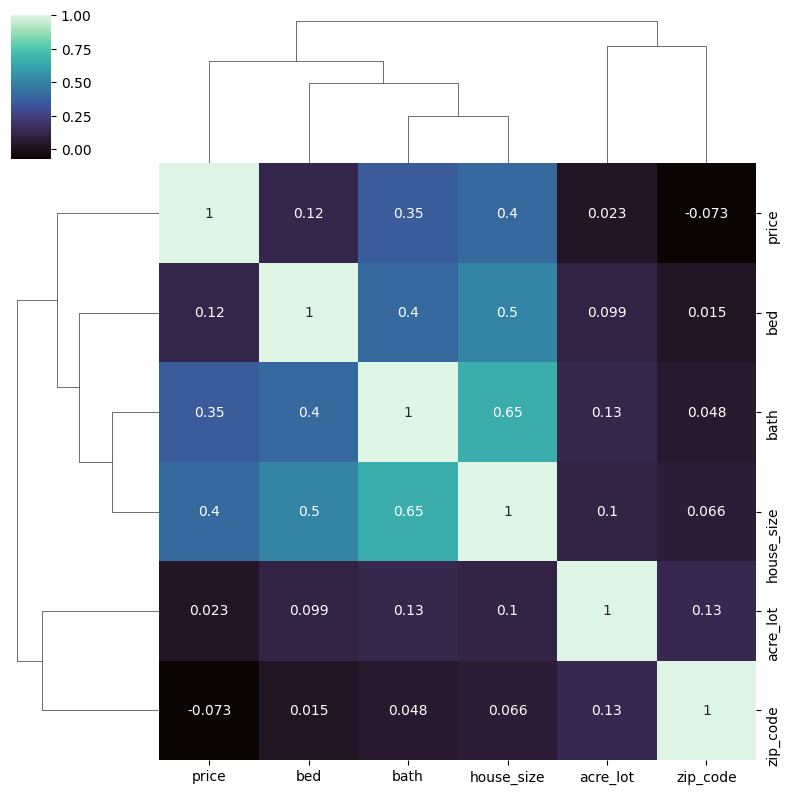

In [25]:
sns.clustermap(
    df.corr(),
    annot=True,
    cmap='mako',
    figsize=(8, 8)
)
plt.show

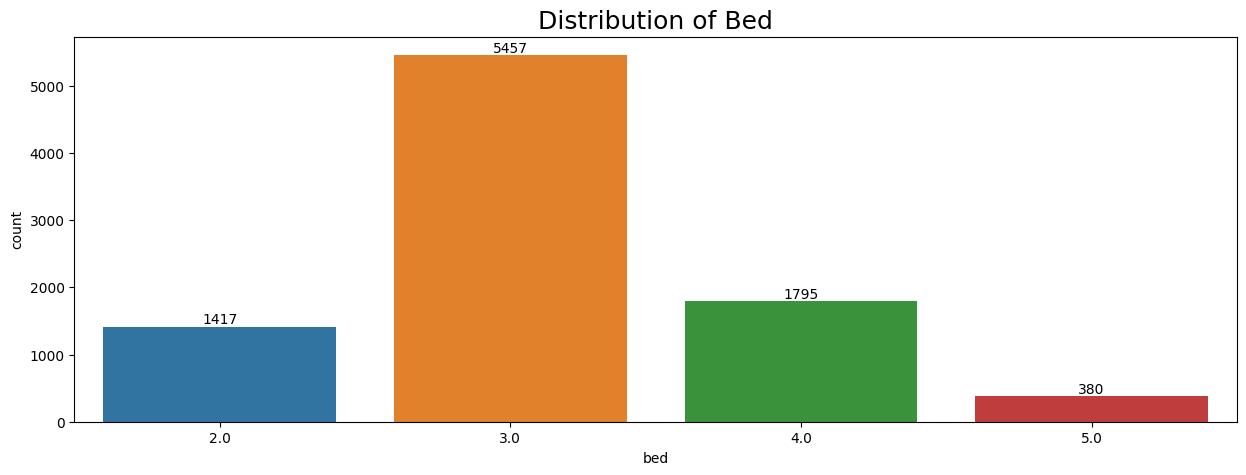

In [26]:
plt.figure(figsize=(15,5))
ax=sns.countplot(data=df,x='bed')
plt.title('Distribution of Bed', fontsize=18)
for i in ax.containers:
    ax.bar_label(i,)

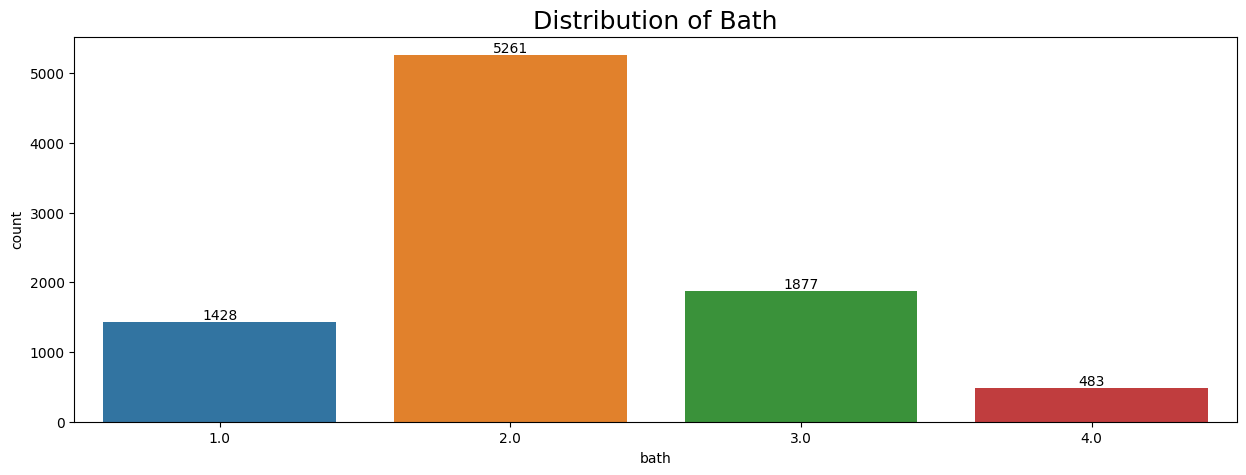

In [27]:
plt.figure(figsize=(15,5))
ax=sns.countplot(data=df,x='bath')
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Distribution of Bath', fontsize=18)
plt.show()

In [28]:
df.groupby('bed', as_index=False).agg({'bath' : 'mean'}).sort_values('bath', ascending=False)

,bed,bath
3,5.0,2.881579
2,4.0,2.615042
1,3.0,2.055525
0,2.0,1.769231


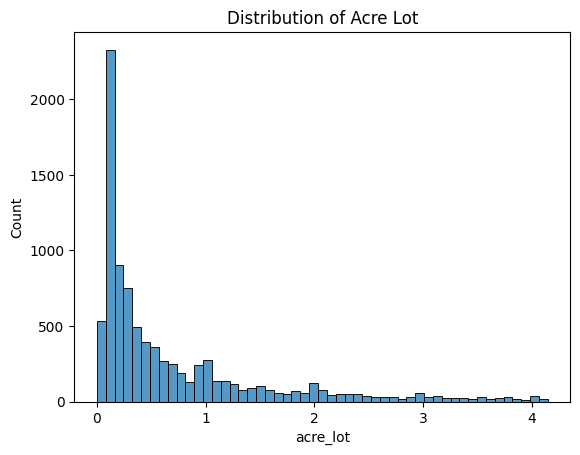

In [29]:
sns.histplot(data=df, x="acre_lot")
plt.title('Distribution of Acre Lot')
plt.show()

In [30]:
df['acre_lot'].value_counts()

0.11    1531
0.23     175
0.08     144
0.09     143
0.25     140
        ... 
1.47       1
2.74       1
3.53       1
2.83       1
3.27       1
Name: acre_lot, Length: 403, dtype: int64

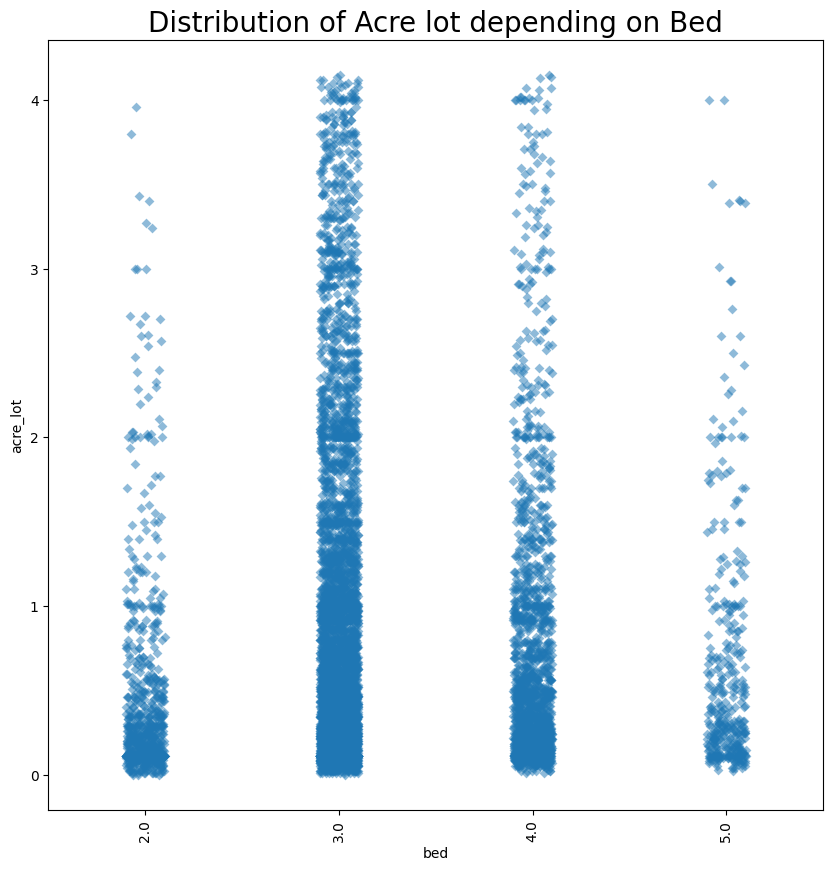

In [31]:
plt.subplots(figsize=(10,10))
plt.xticks(rotation=90)
sns.stripplot(y='acre_lot',x='bed',data=df,marker='D',alpha=0.5)
plt.title('Distribution of Acre lot depending on Bed', fontsize=20)
plt.show()

In [32]:
df.groupby('bed',as_index=False).agg({'acre_lot':'count'}).sort_values('bed',ascending=False)

,bed,acre_lot
3,5.0,380
2,4.0,1795
1,3.0,5457
0,2.0,1417


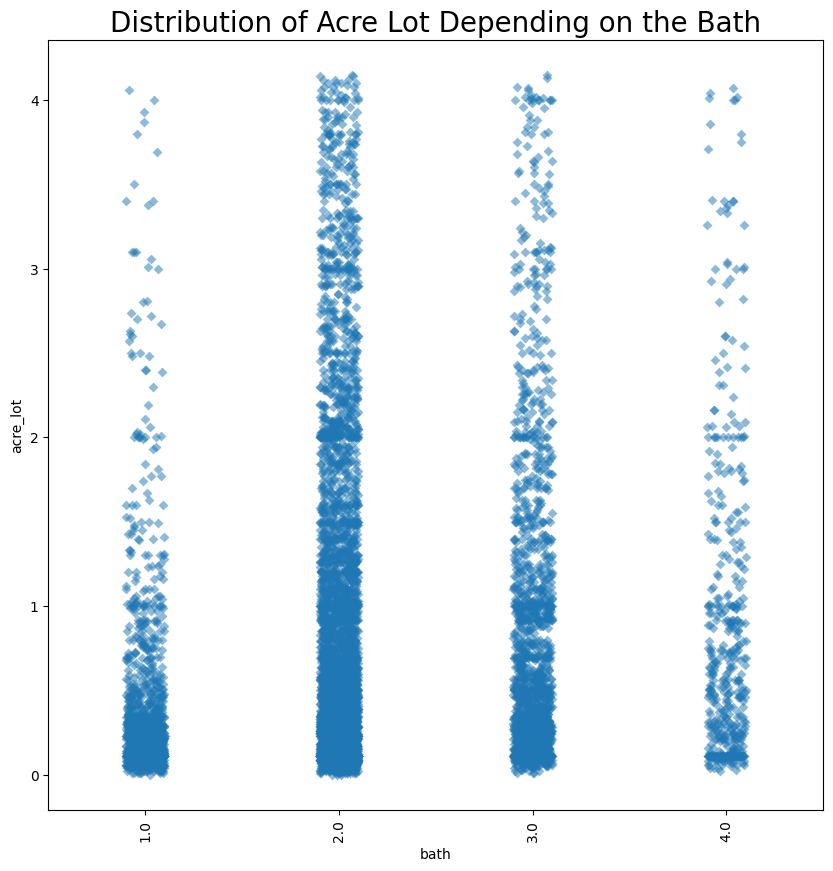

In [33]:
plt.subplots(figsize=(10,10))
plt.xticks(rotation=90)
sns.stripplot(y='acre_lot', x='bath', data=df, marker='D', alpha=0.5)
plt.title('Distribution of Acre Lot Depending on the Bath',fontsize = 20)
plt.show()

In [34]:
df.groupby('bath', as_index=False).agg({'acre_lot' : 'count'}).sort_values('bath', ascending=False)

,bath,acre_lot
3,4.0,483
2,3.0,1877
1,2.0,5261
0,1.0,1428


**Top Five Cities**

In [35]:
City = df['city'].value_counts().reset_index().rename(columns={'index': 'city', 'city': 'count'})
top_5 = City[:5]
fig = px.bar(top_5,'city', y='count', color='city', template='plotly')
fig.update_layout(title='Distribution of Top 5 Cities with Most Houses')
fig.update_traces(texttemplate='%{y:.}', textposition='outside')
fig.show()

In [36]:
top10 = df.groupby('city')['bed'].sum().nlargest(10).reset_index()

fig = px.bar(top10, x='city', y='bed',color='bed', template='plotly',
             title='Top 10 Cities with the Most Total Beds')
fig.update_traces(texttemplate='%{y:.}', textposition='outside')
fig.show()

In [37]:
top10 = df.groupby('city')['bath'].sum().nlargest(10).reset_index()

fig = px.bar(top10, x='city', y='bath',color='bath', template='plotly',
             title='Top 10 Cities with the Most Total Bath')
fig.update_traces(texttemplate='%{y:.}', textposition='outside')
fig.show()

In [38]:
df_mean = df.groupby('city')[['bed', 'bath']].mean().reset_index()

df_mean_sort = df_mean.sort_values(by=['bed', 'bath'], ascending=False)

top10 = df_mean_sort.head(10)

fig = px.bar(top10, x='city', y=['bed', 'bath'], barmode='group',
             color_discrete_sequence=['blue', 'orange'],
             labels={'value': 'Mean Bed and Bath'},
             title='Top 10 Cities with Highest Mean Bed and Bath')

fig.update_traces(texttemplate='%{y:.}', textposition='outside')
fig.show()

In [39]:
top10 = df.groupby('city')['acre_lot'].sum().nlargest(10).reset_index()

fig = px.bar(top10, x='city', y='acre_lot',color='city', template='plotly',
             title='Top 10 Cities with Highest Most Acre Lot')
fig.update_traces(texttemplate='%{y:.2f}', textposition='outside')
fig.show()

In [40]:
df_mean = df.groupby('city')['acre_lot'].mean().reset_index()

df_mean_sort = df_mean.sort_values(by='acre_lot', ascending=False)

top10 = df_mean_sort.head(10)

fig = px.bar(top10, x='city', y='acre_lot', color='acre_lot', template='plotly',
             title='Top 10 Cities with Highest Mean Acre Lot')
fig.update_layout(xaxis_title='City', yaxis_title='Mean Acre Lot')
fig.update_traces(texttemplate='%{y:.2f}', textposition='outside')
fig.show()

In [41]:
fig = px.histogram(df, x='state', nbins=25, color='state', template='plotly')
fig.update_layout(title='Distribution of State')
fig.update_traces(texttemplate='%{y:.2f}', textposition='outside')
fig.show()

In [42]:
city_bed_count = df.groupby(['state', 'bed']).size().reset_index(name='count')

fig = px.bar(city_bed_count, x='state', y='count', color='bed', barmode='stack',
             title='Distribution of State with Bed')
fig.show()

In [43]:
df.groupby('state', as_index=False).agg({'bed' : 'mean'}).sort_values('bed', ascending=False)

,state,bed
5,Puerto Rico,3.156974
0,Connecticut,3.151764
1,Massachusetts,3.117260
8,Vermont,3.111888
4,New York,3.106383
6,Rhode Island,3.066667
2,New Hampshire,3.029126
9,Virgin Islands,3.022346
3,New Jersey,3.000000
7,Tennessee,3.000000


In [44]:
city_bed_count = df.groupby(['state', 'bath']).size().reset_index(name='count')

fig = px.bar(city_bed_count, x='state', y='count', color='bath', barmode='stack',
             title='Distribution of State with Bath')
fig.show()

In [45]:
df.groupby('state', as_index=False).agg({'bath' : 'mean'}).sort_values('bath', ascending=False)

,state,bath
3,New Jersey,3.000000
0,Connecticut,2.243919
2,New Hampshire,2.223301
1,Massachusetts,2.174536
9,Virgin Islands,2.115456
8,Vermont,2.076923
4,New York,2.054711
5,Puerto Rico,2.034997
6,Rhode Island,2.000000
7,Tennessee,2.000000


In [46]:
df.groupby('state', as_index=False).agg({'acre_lot' : 'mean'}).sort_values('acre_lot', ascending=False)

,state,acre_lot
4,New York,1.297112
8,Vermont,1.011818
2,New Hampshire,0.969903
7,Tennessee,0.920000
9,Virgin Islands,0.836425
1,Massachusetts,0.816548
0,Connecticut,0.750051
6,Rhode Island,0.496056
5,Puerto Rico,0.317365
3,New Jersey,0.070000


In [47]:
fig = px.histogram(df, x='house_size', nbins=20)
fig.update_layout(title='Distribution of House Size')
fig.show()

In [48]:
df['house_size'].value_counts()

1200.0    2042
1500.0      57
2000.0      53
1000.0      53
1800.0      48
          ... 
3112.0       1
3142.0       1
2529.0       1
2929.0       1
3140.0       1
Name: house_size, Length: 2218, dtype: int64

In [49]:
fig = px.histogram(df, x='house_size', color='bed', nbins=25, marginal='box',
                   labels={'house_size':'House Size (sqft)'},
                   title='Distribution of House Size with Bed')

fig.show()

In [50]:
df.groupby('bed', as_index=False).agg({'house_size' : 'mean'}).sort_values('house_size', ascending=False)

,bed,house_size
3,5.0,2472.621053
2,4.0,2206.845125
1,3.0,1461.737402
0,2.0,1282.167255


In [51]:

fig = px.histogram(df, x="house_size", color="bath", nbins=25, marginal="box")
fig.update_layout(title="Distribution of House Size with Bath", xaxis_title="House Size", yaxis_title="Count")
fig.show()

In [52]:
df.groupby('bath', as_index=False).agg({'house_size' : 'mean'}).sort_values('house_size', ascending=False)

,bath,house_size
3,4.0,2767.186335
2,3.0,2219.019712
1,2.0,1448.407337
0,1.0,1101.325630


In [53]:
fig = px.scatter(df, x='bed', y='bath', size='house_size', color='bed', opacity=1,
                 marginal_x='histogram', marginal_y='histogram',
                 labels={'bed': 'Bedrooms', 'bath': 'Bathrooms', 'house_size': 'House Size'},
                 title='Distribution of House Size by Bedrooms and Bathrooms')
fig.show()

In [54]:
df_mean = df.groupby('acre_lot')['house_size'].mean().reset_index()

fig = px.scatter(df_mean, x='acre_lot', y='house_size', title='Average House Size by Acre Lot',trendline='ols')
fig.show()

In [55]:
df_mean = df.groupby('city')['house_size'].mean().reset_index()
df_mean_sort = df_mean.sort_values(by='house_size', ascending=False)

top10 = df_mean_sort.head(10)

fig = px.bar(top10, x='city', y='house_size', color='house_size',
             color_continuous_scale='RdYlBu_r')
fig.update_layout(title='Top 10 Cities with Highest Mean House Size',
                  xaxis_title='City', yaxis_title='Mean House Size')
fig.update_traces(texttemplate='%{y:.2f}', textposition='outside')
fig.show()

In [56]:
df.groupby('city', as_index=False).agg({'house_size' : 'mean'}).sort_values('house_size', ascending=False)

,city,house_size
66,Carlisle,3716.5
91,Colrain,3645.0
295,North Kingstown,3608.0
374,Sherborn,3321.0
347,Royalston,3200.0
...,...,...
368,Scotland,960.0
29,Barranquitas,947.0
396,Storrs,915.5
241,Maricao,915.0


In [57]:
df_mean = df.groupby('state')['house_size'].mean().reset_index()

df_mean_sort = df_mean.sort_values(by='house_size', ascending=False)

fig = px.bar(df_mean_sort, x='state', y='house_size', color='state')
fig.update_layout(title='Top 10 States with Highest Average House Size',
                  xaxis_title='State',
                  yaxis_title='Average House Size (sqft)')
fig.update_traces(texttemplate='%{y:.1f}', textposition='outside')
fig.show()

In [58]:
df.groupby('state', as_index=False).agg({'house_size' : 'mean'}).sort_values('house_size', ascending=False)

,state,house_size
2,New Hampshire,1787.143204
1,Massachusetts,1716.812307
0,Connecticut,1678.313121
6,Rhode Island,1667.277778
4,New York,1640.957447
8,Vermont,1579.328671
3,New Jersey,1500.000000
5,Puerto Rico,1470.988163
9,Virgin Islands,1296.487896
7,Tennessee,1200.000000


In [59]:
df['price'].value_counts()

299900.0     98
225000.0     97
249900.0     94
199900.0     93
349900.0     82
             ..
583000.0      1
94600.0       1
249400.0      1
223500.0      1
1599000.0     1
Name: price, Length: 1485, dtype: int64

In [60]:
df['price'].value_counts()

299900.0     98
225000.0     97
249900.0     94
199900.0     93
349900.0     82
             ..
583000.0      1
94600.0       1
249400.0      1
223500.0      1
1599000.0     1
Name: price, Length: 1485, dtype: int64

In [61]:
df.groupby('bed', as_index=False).agg({'price' : 'mean'}).sort_values('price', ascending=False)

,bed,price
2,4.0,473947.877994
3,5.0,466442.405263
0,2.0,325295.515879
1,3.0,296869.212205


In [62]:
df.groupby('bath', as_index=False).agg({'price' : 'mean'}).sort_values('price', ascending=False)

,bath,price
3,4.0,875225.867495
2,3.0,527138.970165
1,2.0,269373.439650
0,1.0,195795.507703


In [63]:
df_mean = df.groupby('acre_lot')['price'].mean().reset_index()

# plot mean price per acre lot
fig = px.scatter(df_mean, x='acre_lot', y='price', trendline='ols')
fig.update_layout(title='Average Price per Acre Lot', xaxis_title='Acre Lot', yaxis_title='Price')
fig.show()

In [64]:
df_mean = df.groupby('city')['price'].mean().reset_index()

df_mean_sort = df_mean.sort_values(by='price', ascending=False)

top10 = df_mean_sort.head(10)

fig = px.bar(top10, x='city', y='price', color='city',
             labels={'city': 'City', 'price': 'Mean Price'},
             title='Top 10 Cities with the Highest Average Price')
fig.update_traces(texttemplate='%{y:.1f}', textposition='outside')
fig.show()

In [65]:
df.groupby('city', as_index=False).agg({'price' : 'mean'}).sort_values('price', ascending=False)

,city,price
109,Dorado,2.148365e+06
364,Santurce,1.685000e+06
304,Old San Juan,1.662500e+06
223,Lexington,1.298223e+06
94,Concord,1.283790e+06
...,...,...
348,Russell,4.990000e+04
155,Granville,4.700000e+04
201,Jefferson City,3.490000e+04
316,Peru,2.990000e+04


In [66]:
df_mean = df.groupby('state')['price'].mean().reset_index()

df_mean_sort = df_mean.sort_values(by='price', ascending=False)

fig = px.bar(df_mean_sort, x='state', y='price',
             title='Top 10 States with Highest Mean Price',
             labels={'state': 'State', 'price': 'Mean Price'})
fig.update_traces(texttemplate='%{y:.1f}', textposition='outside')
fig.show()

In [67]:
df.groupby('state', as_index=False).agg({'price' : 'mean'}).sort_values('price', ascending=False)

,state,price
1,Massachusetts,403388.428793
2,New Hampshire,397427.364078
5,Puerto Rico,358180.805455
6,Rhode Island,357830.633333
3,New Jersey,333490.000000
9,Virgin Islands,308128.566108
0,Connecticut,296011.652621
4,New York,247829.656535
8,Vermont,217241.944056
7,Tennessee,34900.000000


In [68]:
df_mean = df.groupby('price')['house_size'].mean().reset_index()

fig = px.scatter(df_mean, x='price', y='house_size', trendline='ols',
                 labels={'price':'Price', 'house_size':'Mean House Size'})
fig.update_layout(title='Distribution of Mean House Size by Price')
fig.show()

In [69]:
fig = px.scatter(df, x='house_size', y='price', color='bed', size='bath',trendline='ols')
fig.update_layout(title='House Size vs Price',
                  xaxis_title='House Size',
                  yaxis_title='Price')
fig.show()

**Model Prediction**

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [71]:
df['house_size'] = StandardScaler().fit_transform(df['house_size'].values.reshape(len(df), 1))
df['price'] = StandardScaler().fit_transform(df['price'].values.reshape(len(df), 1))

In [72]:
df['bed'] = MinMaxScaler().fit_transform(df['bed'].values.reshape(len(df), 1))
df['bath'] = MinMaxScaler().fit_transform(df['bath'].values.reshape(len(df), 1))
df['acre_lot'] = MinMaxScaler().fit_transform(df['acre_lot'].values.reshape(len(df), 1))

In [73]:
df.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,price
0,for_sale,0.333333,0.333333,0.028916,Adjuntas,Puerto Rico,601.0,-1.045679,-0.527312
1,for_sale,0.666667,0.333333,0.019277,Adjuntas,Puerto Rico,601.0,-0.143914,-0.582571
2,for_sale,0.000000,0.000000,0.036145,Juana Diaz,Puerto Rico,795.0,-1.301204,-0.611305
3,for_sale,0.666667,0.333333,0.024096,Ponce,Puerto Rico,731.0,0.261658,-0.438899
5,for_sale,0.666667,0.666667,0.110843,San Sebastian,Puerto Rico,612.0,1.331297,-0.363748


In [74]:
# label encoding for city and state
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['city'] = label_encoder.fit_transform(df['city'])
df['state'] = label_encoder.fit_transform(df['state'])
# one hot encoding for status
df= pd.get_dummies(df, columns = ['status'])

In [75]:
X=df[['bed', 'bath', 'acre_lot', 'house_size', 'city', 'state']]
y=df['price']

In [76]:
X.head()

,bed,bath,acre_lot,house_size,city,state
0,0.333333,0.333333,0.028916,-1.045679,2,5
1,0.666667,0.333333,0.019277,-0.143914,2,5
2,0.000000,0.000000,0.036145,-1.301204,204,5
3,0.666667,0.333333,0.024096,0.261658,330,5
5,0.666667,0.666667,0.110843,1.331297,360,5


In [77]:

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
#create the decision tree model
model_DT = DecisionTreeRegressor(max_depth=5)

# fit the model to the training data
model_DT.fit(X_train, y_train)

# make predictions on the testing data
y_pred = model_DT.predict(X_test)

# calculate
mse_DT = mean_squared_error(y_test, y_pred)
rmse_DT = mean_squared_error(y_test, y_pred, squared=False)
mae_DT = mean_absolute_error(y_test, y_pred)
r2_DT = r2_score(y_test, y_pred)

In [79]:
r2_DT

0.12861794688533656

In [80]:
# buat model Random Forest dan latih menggunakan data training
model_RF = RandomForestRegressor(n_estimators=100, random_state=42)
model_RF.fit(X_train, y_train)

# lakukan prediksi menggunakan data testing
y_pred = model_RF.predict(X_test)

# hitung nilai rata-rata error menggunakan metrik MSE
mse_RF = mean_squared_error(y_test, y_pred)
rmse_RF = mean_squared_error(y_test, y_pred, squared=False)
mae_RF = mean_absolute_error(y_test, y_pred)
r2_RF = r2_score(y_test, y_pred)

In [81]:
r2_RF

0.23153081883963578

In [82]:
# Buat model Gradient Boosting dan lakukan training pada data training
model_GD = GradientBoostingRegressor(learning_rate=0.05,
    n_estimators=150,
    max_depth=3,
    min_samples_split=4,
    min_samples_leaf=1)
model_GD.fit(X_train, y_train)

# Lakukan prediksi pada data testing
y_pred = model_GD.predict(X_test)

# Evaluasi performa model
mse_GD = mean_squared_error(y_test, y_pred)
rmse_GD = mean_squared_error(y_test, y_pred, squared=False)
mae_GD = mean_absolute_error(y_test, y_pred)
r2_GD = r2_score(y_test, y_pred)

In [83]:
r2_GD


0.24322696220452766

In [84]:
ridge_cv_model = RidgeCV(alphas=(1.38), scoring='neg_mean_absolute_error')
ridge_cv_model.fit(X_train, y_train)

y_pred = ridge_cv_model.predict(X_test)

mse_R = mean_squared_error(y_test, y_pred)
rmse_R = mean_squared_error(y_test, y_pred, squared=False)
mae_R = mean_absolute_error(y_test, y_pred)
r2_R = r2_score(y_test, y_pred)

In [85]:
r2_R

0.12162566159466903

In [86]:
elastic_model = ElasticNetCV(l1_ratio=[0.01], tol=0.01)
elastic_model.fit(X_train, y_train)

y_pred = elastic_model.predict(X_test)

mse_E = mean_squared_error(y_test, y_pred)
rmse_E = mean_squared_error(y_test, y_pred, squared=False)
mae_E = mean_absolute_error(y_test, y_pred)
r2_E = r2_score(y_test, y_pred)

In [87]:
r2_E

0.1035264788715975

In [88]:
results = {
    'Decision Tree': {'MSE': mse_DT, 'RMSE': rmse_DT, 'MAE': mae_DT, 'R^2': r2_DT},
    'Random Forest': {'MSE': mse_RF, 'RMSE': rmse_RF, 'MAE': mae_RF, 'R^2': r2_RF},
    'Gradient Boosting': {'MSE': mse_GD, 'RMSE': rmse_GD, 'MAE': mae_GD, 'R^2': r2_GD},
    'Ridge CV': {'MSE': mse_R, 'RMSE': rmse_R, 'MAE': mae_R, 'R^2': r2_R},
    'ElasticNet CV': {'MSE': mse_E, 'RMSE': rmse_E, 'MAE': mae_E, 'R^2': r2_E}
}

# konversi dictionary ke dalam dataframe
data = pd.DataFrame.from_dict(results, orient='index')
data = data.applymap(lambda x: f'{x:.2f}')
# tampilkan dataframe
print(data)

                    MSE  RMSE   MAE   R^2
Decision Tree      1.47  1.21  0.37  0.13
Random Forest      1.30  1.14  0.33  0.23
Gradient Boosting  1.28  1.13  0.34  0.24
Ridge CV           1.48  1.22  0.39  0.12
ElasticNet CV      1.51  1.23  0.39  0.10


In [89]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20, 30],
    'min_impurity_decrease': [0.0, 0.1, 0.2],
    'bootstrap': [True, False]
}


# Create a RandomForestRegressor model
model_RF = RandomForestRegressor(random_state=42)

# Create the instance of GridSearchCV
grid_search = GridSearchCV(estimator=model_RF, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator from the grid search
best_rf = grid_search.best_estimator_

# Make predictions using the best model obtained from GridSearchCV
y_pred = best_rf.predict(X_test)

# Calculate metrics
mse_RF = mean_squared_error(y_test, y_pred)
rmse_RF = mean_squared_error(y_test, y_pred, squared=False)
mae_RF = mean_absolute_error(y_test, y_pred)
r2_RF = r2_score(y_test, y_pred)

# Output the best parameters and the corresponding scores
print(f"Best parameters found: {grid_search.best_params_}")
print(f"MSE: {mse_RF}, RMSE: {rmse_RF}, MAE: {mae_RF}, R^2: {r2_RF}")


KeyboardInterrupt: ignored

After using lots of techniques we are not getting good accuracy.. We will try different data cleaning process


In [110]:
df1=pd.read_csv('house data.csv')

In [111]:
df1.isnull().sum()

status                 0
bed               216528
bath              194213
acre_lot          357467
city                 191
state                  0
zip_code             479
house_size        450112
prev_sold_date    686293
price                108
dtype: int64

Noticed that there are 108 missing values in the target variables pricing. Since the main objective of this project is to predict the price, we will remove any records with a missing pricing values.

In [112]:
df1.dropna(subset = 'price', inplace=True)

In [113]:
def remove_with_all_missing(df):
    '''
    Remove the records when all important features are missing,
    Here, I removed reocrds when housing size, bedroom, bathroom and acre lot are missing
    '''
    df = df[(~df['house_size'].isnull())
        | (~df['bed'].isnull())
        | (~df['bath'].isnull())
        | (~df['acre_lot'].isnull())]
    return df

In [114]:
df_clean = remove_with_all_missing(df1)

In [115]:
def filling_house_size_lot(df):
    # first, obtain the median house size using bathroom bedroom counts as group
    # similarity find the median house size using zip code as group
    # find the median appeared lot size using zip code as group
    df_mode_house_size = df.groupby(['bath', 'bed'], as_index=False)['house_size'].median().rename(columns = {'house_size':'filled_house_size'})
    df_house_size_per_zip = df.groupby('zip_code', as_index=False)['house_size'].median().rename(columns = {'house_size':'fill_house_size_with_zip'})
    df_lot_per_zip = df.groupby('zip_code', as_index=False)['acre_lot'].median().rename(columns = {'acre_lot':'fill_acre_lot_with_zip'})

    df = df.merge(df_mode_house_size, on = ['bath', 'bed'], how='left').merge(df_house_size_per_zip, on = ['zip_code'], how='left')\
    .merge(df_lot_per_zip, on = ['zip_code'], how='left')

    # fill missing values for house size
    df.loc[(df['house_size'].isnull()) & (~df['filled_house_size'].isnull()), 'house_size'] = df.loc[(df['house_size'].isnull()) & (~df['filled_house_size'].isnull()), 'filled_house_size']
    df.loc[(df['house_size'].isnull()) & (~df['fill_house_size_with_zip'].isnull()), 'house_size'] = df.loc[(df['house_size'].isnull()) & (~df['fill_house_size_with_zip'].isnull()), 'fill_house_size_with_zip']

    # fill missing values for lot size
    df.loc[(df['acre_lot'].isnull()) & (~df['fill_acre_lot_with_zip'].isnull()), 'acre_lot'] = df.loc[(df['acre_lot'].isnull()) & (~df['fill_acre_lot_with_zip'].isnull()), 'fill_acre_lot_with_zip']
    df.drop(['filled_house_size','fill_house_size_with_zip', 'fill_acre_lot_with_zip'], axis = 1, inplace=True)
    return df

In [116]:
df_clean = filling_house_size_lot(df_clean)

Drop the remaining missing values if there is not many

colum pre_sold_date have many missing values and also it does not have any significant correlation with the house price. We will drop it from this analysis.
If the remaining data does not have many records with missing values, we can only keep the rows without missing values

In [117]:
df_clean.drop('prev_sold_date', axis = 1, inplace = True)

In [118]:
print(f"If we drop all records with any missing values, we will keep {round(df_clean.dropna().shape[0] / df_clean.shape[0] * 100, 2)} of rows from our data.")

If we drop all records with any missing values, we will keep 84.14 of rows from our data.


In [119]:
df_clean.dropna(inplace=True)

**After we filled the missing values and removed rows with any missing values, we end with a data frame without any missing values.**

In [120]:
df_clean.isnull().sum()

status        0
bed           0
bath          0
acre_lot      0
city          0
state         0
zip_code      0
house_size    0
price         0
dtype: int64

In [102]:
# label encoding for city and state
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_clean['city'] = label_encoder.fit_transform(df_clean['city'])
df_clean['state'] = label_encoder.fit_transform(df_clean['state'])
# one hot encoding for status
df_clean = pd.get_dummies(df_clean, columns = ['status'])

After cleaning and preprocessing the dataset, we are now ready to move to model building


In [103]:
df_clean.reset_index(drop = True, inplace = True)

In [104]:
df.shape

(9049, 10)

# Model Development

**First, get training and testing data ready**


In [105]:
X = df_clean.drop('price', axis = 1)
y = df_clean['price']
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2)

Second, we will develop a baseline model using median home price for each zip code. In case there are some missing zip code in the testing set, we will fill them with median home price for all areas.

In [106]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([('scaler', StandardScaler()), ('Random Forest Regressor', RandomForestRegressor())])
pipe.fit(train_X, train_y)

KeyboardInterrupt: ignored

In [ ]:
def get_scores(true_y, pred_y):
    performance = {
        'MAE':mean_absolute_error(test_y, pred_y),
        'MSE':mean_squared_error(test_y, pred_y),
        'R2-Score':r2_score(test_y, pred_y)
    }
    return performance

In [ ]:
y_pred = pipe.predict(test_X)
rf_performance = get_scores(test_y, y_pred)

In [ ]:
rf_performance

In [ ]:
import pickle

# Save to a pickle file
with open('model_rf.pkl', 'wb') as file:
    pickle.dump(pipe, file)



In [ ]:
import json
columns = {
    'data_columns':[col.lower() for col in X.columns]
}
with open ("columns.json",'w') as f:
  f.write(json.dumps(columns))